<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/MR2_Naive_Bayes_Classifier_Spring_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 **Applying Naïve Bayes for Credit Default Prediction**


## 🔍 **Import Necessary Libraries**

In [6]:
# Import necessary libraries
import numpy as np  # For numerical operations and array manipulation
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For visualization

# Import machine learning components from scikit-learn
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes model
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.metrics import (
    confusion_matrix,  # To evaluate classification performance
    classification_report,  # To generate a detailed classification report
    roc_auc_score,  # To calculate the ROC AUC score
    roc_curve,  # To plot the Receiver Operating Characteristic (ROC) curve
    ConfusionMatrixDisplay  # To visualize the confusion matrix
)


---
## 📌 **Load and Explore the Dataset**

In [39]:
# Load dataset from an online source
url = 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/Default.csv'
default_df = pd.read_csv(url)

# Display basic dataset information
default_df.info()  # Column types and missing values
default_df.head()  # First few rows of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879



### **🤔 Why do we do this?**
- **`info()`** → Helps us check **data types** and **missing values**.
- **`head()`** → Allows us to quickly **see column names and sample data**.
- Ensures we **understand what each column represents** before modeling.

✅ **Real-Life Example:**
Imagine a **bank analyst** 🏦 evaluating customer profiles for loan approval.
- Before applying machine learning, they need to **ensure all required financial metrics are available**.
- If some columns are missing values, predictions might be **biased or inaccurate**.

---

## 📌 **Convert Categorical Variables**

In [40]:
# Convert categorical variable "student" into a numeric format
default_df_dummies = pd.get_dummies(default_df, columns=['student'], drop_first=True)
default_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      10000 non-null  object 
 1   balance      10000 non-null  float64
 2   income       10000 non-null  float64
 3   student_Yes  10000 non-null  bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 244.3+ KB


### **🤔 Why do we do this?**
- Machine learning models **work with numbers, not text**.
- **One-hot encoding** (converting categories into 0s and 1s) ensures that the model **understands categorical data**.
- **`drop_first=True`** prevents redundancy by keeping only **one binary column** for `student`.

✅ **Real-Life Example:**
Imagine an **e-commerce company** 🛒 analyzing customer data.
- Instead of "Gold", "Silver", and "Bronze" memberships as text labels, they use **numbers (0s and 1s)**.
- This way, the AI can determine if **Gold members spend more** without confusion.

---

---

## 📌 **Split Data into Training and Testing Sets**

Scikit-learn documentation about NB:

https://scikit-learn.org/stable/modules/naive_bayes.html


In [41]:
# Separate predictors and target variable
X_all = default_df_dummies.drop('default', axis=1)
y_default = default_df_dummies['default']

In [ ]:
# Calculate the proportion of each unique value in the target variable (y_default)
# This helps to check class distribution and identify any imbalance in the dataset
y_default.value_counts(normalize=True)

In [42]:
# Preserve class balance when splitting data
X_train, X_test, y_train, y_test = train_test_split(X_all, y_default, test_size=0.2, random_state=1, stratify=y_default)

In [ ]:

# Check class distribution in train and test sets
y_train.value_counts(normalize=True)

In [18]:
y_test.value_counts(normalize=True)

,proportion
default,
No,0.9665
Yes,0.0335


### **🤔 Why do we do this?**
- **Stratification** ensures that the **train and test sets have the same proportion** of "default" and "no default" cases.
- Checking **class distribution before and after splitting** helps ensure that **both sets are representative**.
- Prevents **bias**, ensuring the model isn’t trained on **imbalanced data**.

✅ **Real-Life Example:**
Imagine a **fraud detection team** 💳 training an AI model to detect **credit card fraud**.
- If the **fraud cases (minority class) aren’t well-represented**, the model might **fail to detect fraud**.
- **Stratified splitting** ensures that both **fraudulent and non-fraudulent transactions are present** in both training and test data.

---

Compared to the whole dataset, do the proportions of 'No' and 'Yes' remain similar in the train and test datasets?

There are two hyperparameters only in NB and usually the default values are used (which means that usually no hyperparameter is tuned when applying NB):

_priors:_ array-like of shape (n_classes,), default=None

Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

_var_smoothing:_ float, default=1e-9

Portion of the largest variance of all features that is added to variances for calculation stability.

---

## 📌 **Train the Naïve Bayes Model**

In [19]:
# Train the Naïve Bayes classifier
nb_classifier_default = GaussianNB()
nb_classifier_default.fit(X_train, y_train)


### **🤔 Why do we do this?**
- **Naïve Bayes** calculates probabilities based on the assumption that **features are independent**.
- It is **fast and works well with small datasets**.

✅ **Real-Life Example:**
Imagine a **spam detection system** 📧.
- If an email contains words like "free", "win", or "urgent", **NB estimates the probability** of it being spam.
- Even if it **doesn’t analyze sentence meaning**, it is **still highly effective**.

---


## 📌 **Make Predictions with the Trained Model**

In [21]:
# Generate predictions on the test dataset
y_pred_test_default = nb_classifier_default.predict(X_test)

### **🤔 Why do we do this?**
- Once the model is trained, we use it to **predict default cases on unseen data**.
- Helps **evaluate how well the model generalizes** to new customers.

✅ **Real-Life Example:**
Imagine a **bank loan system** 🏦 where a new applicant applies for a loan.
- The system takes their financial history and **predicts if they are likely to default** before approving the loan.

---

## 📌 **Evaluate Model Performance with a Confusion Matrix**

In [22]:
# Compute confusion matrix to assess correct and incorrect predictions
conf_matrix = confusion_matrix(y_test, y_pred_test_default)

array([[1924,    9],
       [  48,   19]])

In [23]:
# Retrieve the unique class labels recognized by the trained Naive Bayes classifier
# This confirms which classes the model has been trained to predict
nb_classifier_default.classes_


array(['No', 'Yes'], dtype='<U3')

In [24]:

# Format it for better visualization
df_conf_mattrix = pd.DataFrame(conf_matrix, index=['Actual_No','Actual_Yes'], columns=['Pred_No','Pred_Yes'])

df_conf_mattrix

In [25]:
df_conf_mattrix

,Pred_No,Pred_Yes
Actual_No,1924,9
Actual_Yes,48,19



### **🤔 Why do we do this?**
- The confusion matrix **reveals the types of errors** the model makes.
- It shows **false positives (wrongly predicted defaults)** and **false negatives (missed actual defaults)**.

✅ **Real-Life Example:**
Imagine an **airport security system** ✈️.
- A **False Positive** means an innocent traveler is wrongly flagged as a security threat.
- A **False Negative** means an actual threat is **missed**, leading to **high risk**.
- The confusion matrix helps improve the accuracy of **security screenings**.

---

## 📌 **Generate Classification Report**

In [26]:
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_test_default))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1933
         Yes       0.68      0.28      0.40        67

    accuracy                           0.97      2000
   macro avg       0.83      0.64      0.69      2000
weighted avg       0.97      0.97      0.97      2000



### **🤔 Why do we do this?**
- **Precision** tells us how many of the predicted defaults were **actually correct**.
- **Recall** shows how many of the actual defaults were **correctly identified**.
- **F1-score** balances precision and recall to measure **overall model effectiveness**.

✅ **Real-Life Example:**
Imagine a **medical diagnosis system** 🏥 detecting cancer.
- **High precision** means **most diagnosed cases actually have cancer**.
- **High recall** means **we are catching most cancer cases**.
- If recall is low, **some patients will go undiagnosed**, making the model dangerous.

---

100% recall for the 'No' class? Does not that contradict the confusion matrix?

**What are the most important predictors used by the NB classifier?**

Although NB uses all the features when predicting Y, we know that not all predictors are equally important.

Unfortunately, there is not direct way to evaluate importance of each feature in NB.

But fortunately, there is an indirect way, applicable to any classification method: the permutation importance method.

From the scikit-learn documentation:

"Permutation_importance is a method used to estimate the importance of each feature in a predictive model by randomly shuffling the values of a single feature and observing the impact on the model's performance."

"Use the original trained model to make predictions on the test set with permuted features (X_test with one feature permuted at a time)."

"Compare the performance of the model on the test set with permuted features to the baseline performance."

"The permutation importance is defined to be the difference between the baseline metric and metric from permutating the feature column."

"The drop in performance indicates the importance of the feature. If permuting a feature leads to a significant drop in performance, that feature is considered important."

The permutation_importance function is typically used on the test set, not the training set. This is because you want to evaluate the impact of permuting the feature values on the model's performance in predicting new, unseen data.

## 📌 **Feature Importance Using Permutation Importance (Skip Running This Step)**

In [27]:
from sklearn.inspection import permutation_importance

In [ ]:
# Estimate feature importance using permutation importance
# n_repeats represents the # of times we permute each column (each feature)
permutation_imp_results = permutation_importance(nb_classifier_default, X_test, y_test, n_repeats=10, random_state=1)

# Extract mean importance scores for each feature
# The final importance is the average obtained after each feature has been permuted 'n_repeats' times
permutation_feature_imp = permutation_imp_results.importances_mean

# Convert results into a DataFrame
permutation_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': permutation_feature_imp})

In [46]:
permutation_importance_df

,Feature,Importance
0,balance,0.01685
1,income,-0.00145
2,student_Yes,-0.00125


In [47]:
# Display sorted feature importance values
permutation_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,balance,0.01685
2,student_Yes,-0.00125
1,income,-0.00145


### **🤔 Why do we do this?**
- Permutation importance helps **understand which features most affect predictions**.
- If a feature’s importance is low, it might not be useful for the model and can be removed.

✅ **Real-Life Example:**
Imagine a **retail company** 🛒 predicting customer purchases.
- **Income** might be a strong predictor of spending, while **ZIP code** might not be.
- If **ZIP code** has low importance, the company can **ignore it to simplify the model**.

---

AUC and ROC curve


---

## 📌 **Compute the ROC-AUC Score & Plot the ROC Curve**

In [48]:
# Compute the Area Under the ROC Curve (AUC)
roc_auc_nb = roc_auc_score(y_test, nb_classifier_default.predict_proba(X_test)[:, 1])

In [34]:
# Area under the ROC curve

np.round (roc_auc_nb, 3)

0.951

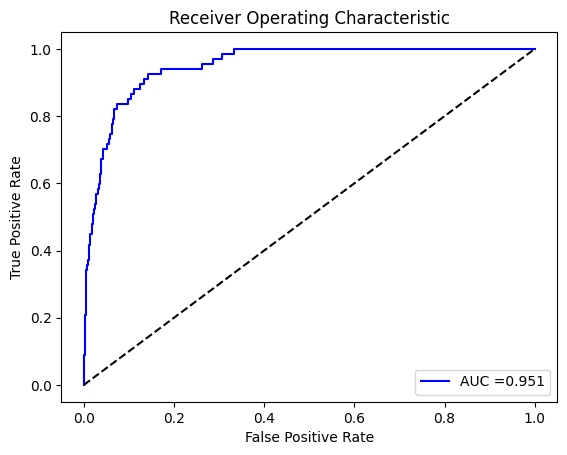

In [49]:
# Plot ROC Curve

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values
# The ROC curve helps evaluate the classification model's performance
fpr, tpr, threshold = roc_curve(y_test, nb_classifier_default.predict_proba(X_test)[:, 1], pos_label='Yes')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Plot the ROC curve using FPR and TPR
# The blue line represents the ROC curve
plt.plot(fpr, tpr, 'b', label='AUC =' + str(np.round(roc_auc_nb, 3)))

# Add a legend at the lower right to display the AUC score
plt.legend(loc='lower right')

# Plot a diagonal dashed line (random classifier baseline)
plt.plot([0, 1], [0, 1], 'k--')

# Label the x-axis as 'False Positive Rate'
plt.xlabel('False Positive Rate')

# Label the y-axis as 'True Positive Rate'
plt.ylabel('True Positive Rate')

# Display the ROC curve plot
plt.show()


### **🤔 Why do we do this?**
- The **ROC curve** visualizes the trade-off between true positives and false positives.
- **AUC score** (Area Under the Curve) measures how well the model distinguishes between defaulters and non-defaulters.

✅ **Real-Life Example:**
Imagine a **fraud detection model** 💳 flagging fraudulent transactions.
- **High AUC** means the model effectively separates **fraudulent vs. legitimate transactions**.
- **Low AUC** means the model **struggles to differentiate fraud from normal spending**, leading to financial risks.

---



## **🔎 Conclusion & Next Steps**
✔ **Naïve Bayes is computationally efficient** but **assumes feature independence**.
✔ **AUC score and confusion matrix** are crucial for evaluating performance beyond just accuracy.
✔ **Next Step:** Apply Naïve Bayes to a different dataset (Customer Churn Prediction). 🚀

# 📌 **Applying Naïve Bayes for Credit Default & Customer Churn Prediction**

## 📌 **Load and Explore the Customer Churn Dataset**

In [59]:
# Load the customer churn dataset
url = 'https://raw.githubusercontent.com/Requenamar3/Machine-Learning/refs/heads/main/bank_customer_churn.csv'
churning_df = pd.read_csv(url)

# Display basic dataset information
churning_df.info()  # Check column names, data types, and missing values
churning_df.head()  # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **🤔 Why do we do this?**
- **`info()`** helps us check for **missing values and data types**.
- **`head()`** gives a quick preview of the dataset’s structure.
- Understanding the data **prevents errors** before training the model.

✅ **Real-Life Example:**
Imagine a **telecom company** 📞 analyzing customer data.
- Before predicting **who will cancel their subscription**, they must check if **all customer details are complete**.
- Missing data in **monthly charges or contract type** can lead to **incorrect predictions**.

---

## 📌 **Remove Unnecessary Columns**

In [53]:
# Remove columns that don't contribute to model predictions
churning_df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Display dataset structure after column removal
churning_df.info()

### **🤔 Why do we do this?**
- **Customer ID and Surname** are **unique identifiers**, not predictive features.
- Removing irrelevant data **improves model efficiency and prevents noise**.

✅ **Real-Life Example:**
Imagine a **car rental company** 🚗 predicting accident risks.
- The **customer’s ID number** has no impact on accident probability.
- However, **driving experience, vehicle type, and past accidents matter**.

---

## 📌 **Analyze Class Distribution**

In [55]:
# Check the proportion of customers who left (Exited = 1) vs. stayed (Exited = 0)
churning_df['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037


### **🤔 Why do we do this?**
- Helps detect **imbalanced data**, where one class is significantly larger.
- **If too many customers didn’t churn**, the model might **favor predicting 'No Churn'**.

✅ **Real-Life Example:**
Imagine an **online streaming service** 🎬 predicting subscription cancellations.
- If **95% of users renew**, the model might just **predict 'renew' for everyone**.
- This would give **high accuracy but zero value** in spotting real cancellations.

---

## 📌 **Convert Categorical Variables**

There are four categorical predictors: Geography, Gender, HasCrCard, and IsActiveMember.

However, only two are coded as categorical: Geography and Gender.

HasCrCard and IsActiveMember are already coded as binary variables.

We only need to create the dummies for Geography and Gender.

In [60]:
# Convert categorical features 'Geography' and 'Gender' into numeric values
churning_df_dummies = pd.get_dummies(churning_df, columns=['Geography', 'Gender'], drop_first=True)

# Display updated dataset structure
churning_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Age                10000 non-null  int64  
 5   Tenure             10000 non-null  int64  
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  int64  
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Geography_Germany  10000 non-null  bool   
 13  Geography_Spain    10000 non-null  bool   
 14  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(9), object(1)
memory usage: 966.9+ KB


### **🤔 Why do we do this?**
- Machine learning models **only process numerical data**.
- **One-hot encoding** converts categories into **binary variables (0s and 1s)**.
- **`drop_first=True`** avoids redundancy by dropping the first category.

✅ **Real-Life Example:**
Imagine a **hotel booking system** 🏨 predicting cancellations.
- A customer’s country might affect **booking behavior**.
- Instead of using "USA, UK, France" as text, we create **binary indicators** for each.

---

In [58]:
# Count the number of occurrences for each country in 'Geography'
churning_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


### **🤔 Why do we do this?**
- Helps verify if certain categories are **overrepresented**.
- **A dominant category might bias the model**, making it assume all customers behave the same.

✅ **Real-Life Example:**
Imagine a **car insurance company** 🚘 predicting accident risks.
- If **80% of customers are from one city**, the model might wrongly assume **location doesn’t matter**.
- This could lead to **incorrect risk assessments for other cities**.

---


## **🔎 Next Steps**
✔ **Data is now preprocessed** and ready for training.
✔ **Next Step:** Apply **Naïve Bayes on customer churn data** to predict who will leave. 🚀

CONTINUE FROM HERE AND ON !

DO NOT RUN THE PERMUTATION IMPORTANCE!